### Programming for Psychologists - Home assignment 2024/2025
# **Brain activity regions in Anxiety Disorders**

**Name:** Edoardo Galli\
**Date:** 29/11/2024\
**Student n** 2859426

Data source: "File"[https://neurosynth.org/analyses/terms/anxiety%20disorders/]

My project visualizes the correlation between brain activity and **anxiety disorders** using fMRI data sourced from Neurosynth (see link). The fMRI  data highlight brain regions with strong statistical associations to anxiety disorders (spatial context), derived from a meta-analysis of 95 studies. Moreover, the project includes a histogram analysis, providing insight into the distribution of functional activation values.

### **Importing libraries required**

Libraries need to be installed before importing them. Theese are all the libraries required. 

In [2]:
# import all libraries needed
import os
import nibabel as nib
from nilearn import plotting
import matplotlib.pyplot as plt
import numpy as np



### **Step number 1** importing files
the code defines a function, find_mri_files, to find specific .nii.gz files in a specific folder indicated by me. It searches for an anatomical MRI file ("anatomical") and a functional file ("uniformity") and returns their paths. The folder path is indicated, and the function is called to find the required files for the project. If the file is missing, an error is pointed out to ensure proper input for next analysis

In [4]:

folder_path = '/Users/sirikagen/Desktop/Home-assignment--Edoardo' # Adjust to your folder
files = os.listdir(folder_path)

anatomical_file = next(f for f in files if "anatomical" in f and f.endswith('anatomical.nii')) #ensure that the name of the file is identical to the data file in your folder
functional_file = next(f for f in files if "uniformity" in f and f.endswith('anxiety disorders_uniformity-test_z_FDR_0.01.nii'))


print("Anatomical file:", anatomical_file)
print("Functional file:", functional_file)


Anatomical file: anatomical.nii
Functional file: anxiety disorders_uniformity-test_z_FDR_0.01.nii


### **Step number 2** loading files

the code uses the Nibabel library to load the anatomical and functional .nii.gz files into Python as Nibabel image objects. The nib.load() function reads the file paths identified in the previous step and converts them into figures and then use them for analysis and visualization. files are ready fro visualization!

In [6]:

# step number 2: loading the files using Nibabel
anatomical_img = nib.load(anatomical_file)
functional_img = nib.load(functional_file)



### **Step number 3** Visualization of fMRI data set - Brain map

This code visualizes functional MRI data of an anatomical MRI scan using Nilearn’s plot_stat_map function. 
- customization of the visualization with a title referencing anxiety disorders
- a voxel threshold of 0.1 to exclude low-activation values (as indicated)
- an orthogonal view, and specific cut coordinates (26, -6, -15) to get a better data visualization  
- colormap "cool" has been used to use cold colors for better interpretability.
 
 This step is performed to visually explore brain regions associated with anxiety disorders, providing spatial context. 

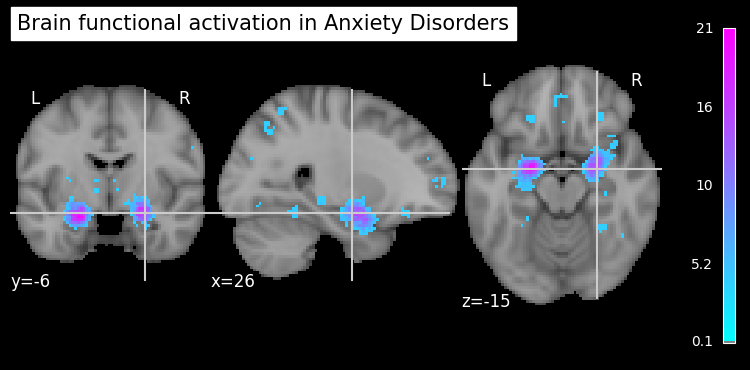

In [8]:
# step number 3: Visualization of the functional data into the the anatomical scan
from nilearn import plotting

# customization of the visualization
from nilearn import plotting

# changing and personalizing the visualization for brainamp
plotting.plot_stat_map(
    functional_img,  # functional data file
    bg_img=anatomical_img,  # anatomical background
    title="Brain functional activation in Anxiety Disorders",  # title name
    threshold=0.1,  # excluding values below voxel thershold lv
    display_mode="ortho",  # orthogonal view
    cut_coords=(26, -6, -15), #xyz
    cmap="cool"  # colour 
)

plotting.show()






### **Step number 4** Plotting a histogram - Functional data

This code creates a histogram to analyze the distribution of voxel intensity values in the functional MRI data. At the beginning it extracts the functional data as a NumPy array and assign to it only positive values, showing significant activations. 

The histogram is plotted with:
- 50 bins
- a purple color and gridlines for clarity +  a title and labeled axes

we now have a quantitative overview of the voxel value distribution that allow us to get a better understanding of the spread and intensity of functional activations associated with anxiety disorders.

/var/folders/yg/5st2rqtj1fj_p5lyc22p30d80000gn/T/ipykernel_6682/3532304274.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('cool')  # Choose a colormap


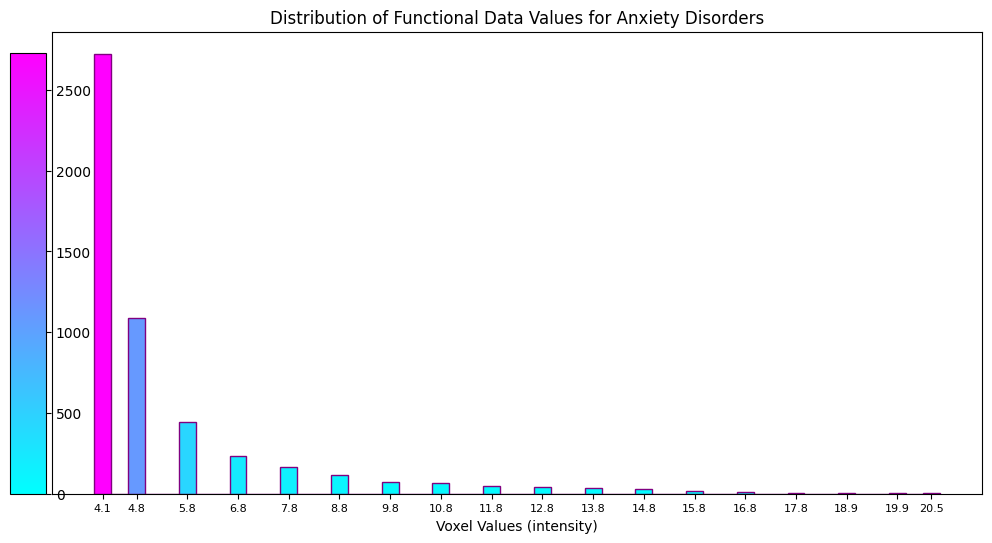

In [206]:
# step number 4: histogram 
# upload the functional data as a NumPy array
functional_data = functional_img.get_fdata()

# only positive values 
positive_values = functional_data[functional_data > 0]
counts = (positive_values)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# plottin the histogram and customization of it
plt.figure(figsize=(12, 6))
counts, bins, patches = plt.hist(positive_values, edgecolor = 'purple', bins=50, alpha=1)
plt.title("Distribution of Functional Data Values for Anxiety Disorders")  # set title
plt.xlabel("Voxel Values (intensity)")  # X-axis name
#plt.ylabel("Frequency")  # Y-axis name
plt.grid(axis='y', alpha=0.75)

bin_centers = (bins[:-1] + bins[1:]) / 2  # Compute bin centers
non_zero_centers = bin_centers[counts > 0]
plt.xticks(non_zero_centers, labels=[f"{center:.1f}" for center in non_zero_centers], size = 8)  # Format labels
plt.yticks([])


# Normalize the counts for a colormap
norm = mcolors.Normalize(vmin=min(counts), vmax=max(counts))
cmap = cm.get_cmap('cool')  # Choose a colormap

# Define a function to get the color based on count
def get_color_for_count(count):
    return cmap(norm(count))

# Apply the colors to each histogram patch (bar)
for patch, count in zip(patches, counts):
    patch.set_facecolor(get_color_for_count(count))

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Only needed for the colorbar


fig = plt.gcf()  # Get the current figure
cbar_axes = fig.add_axes([0.09, 0.11, 0.03, 0.735])  # [left, bottom, width, height]

# Create the colorbar using the custom axes
cbar = plt.colorbar(sm, cax=cbar_axes, orientation='vertical')


plt.show()
